In [1]:
import math
import os.path
import pandas as pd
import json
from random import shuffle
from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
print (os.getcwd())

/Users/Kabbani/Desktop/Insper/Ciência dos Dados/P3-CD-AA-BK-GB-GK


In [2]:
dados=pd.read_csv('AB_NYC_2019.csv')
dados=dados[dados.room_type=='Entire home/apt']
dados.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [3]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

## Análise Exploratória

### Latitude e longitude:

In [4]:
y=dados['price']
x=dados[['latitude','longitude']]

regressao=regress(x,y)
regressao.summary()

/Users/Kabbani/anacondanew3/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     221.4
Date:                Mon, 11 Nov 2019   Prob (F-statistic):           4.82e-96
Time:                        16:06:40   Log-Likelihood:            -1.7937e+05
No. Observations:               25409   AIC:                         3.588e+05
Df Residuals:                   25406   BIC:                         3.588e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.269e+04   3483.897    -20.866      0.000   -7.95e+04   -6.59e+04
latitude     277.9335     34.992      7.943      0.000     209.348     346.519
longitude   -832.6832     41.627    -20.004      0.000    -914.274    -751.093
==============================================================================
Omnibus:                    51292.664   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        190325287.639
Skew:                          16.675   Prob(JB):                         0.00
Kurtosis:                     425.681   Cond. No.                     1.67e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
c=regressao.params['const']
lat=regressao.params['latitude']
long=regressao.params['longitude']

In [6]:
def f(latitude,longitude):
    return c + lat*latitude + long*longitude

In [7]:
npoints=100
latitude= np.linspace(x['latitude'].min(), x['latitude'].max(), npoints)
longitude= np.linspace(x['longitude'].min(), x['longitude'].max(), npoints)

In [8]:
latitude_x , longitude_y = np.meshgrid(latitude,longitude)

In [9]:
s = f(latitude_x,longitude_y)

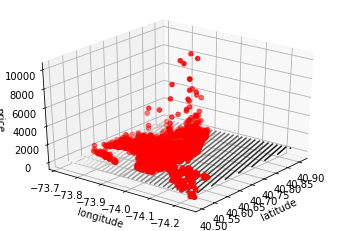

In [10]:
import matplotlib.pyplot as plt
%matplotlib notebook
fig=plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x['latitude'],x['longitude'],y,c='r',marker='o')
ax.contour3D(latitude_x,longitude_y,s,50,cmap='binary')
ax.view_init(30,-142)
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_zlabel('price')
plt.show()